In [26]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
#checking the mall customer data
mall_cust = pd.read_csv('/home/samtaecay/Downloads/Mall_Customers.csv')

In [4]:
print(mall_cust)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [14]:
#one hot encoding the categorical variables and dropping one category to enable accurate kmeans clustering modeling
gnder = pd.get_dummies(mall_cust.Gender)

mallc = pd.concat([mall_cust,gnder], axis= 'columns')

mallx = mallc.drop(['CustomerID',"Gender", 'Female'],axis='columns')
print(mallx)

income = mallx['Annual Income (k$)']
age = mallx.Age
sscore = mallx['Spending Score (1-100)']


     Age  Annual Income (k$)  Spending Score (1-100)  Male
0     19                  15                      39     1
1     21                  15                      81     1
2     20                  16                       6     0
3     23                  16                      77     0
4     31                  17                      40     0
..   ...                 ...                     ...   ...
195   35                 120                      79     0
196   45                 126                      28     0
197   32                 126                      74     1
198   32                 137                      18     1
199   30                 137                      83     1

[200 rows x 4 columns]


In [10]:
#creating a kmeans clustering model with three clusters to fit the data
model = KMeans(n_clusters=3)

In [11]:
results = model.fit_predict(mallx)

Text(0.5, 0, 'Spending Score (1-100)')

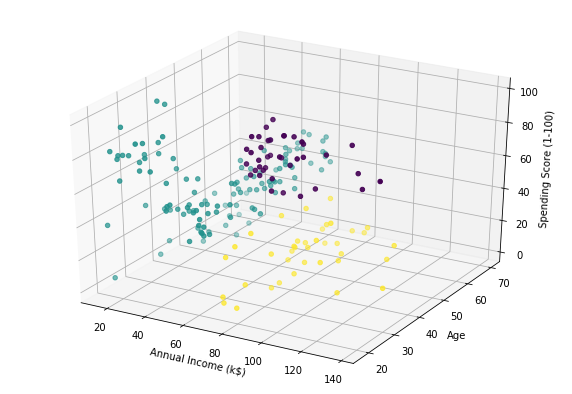

In [27]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(income, age, sscore, c=results)
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score (1-100)')